In [303]:
import pandas as pd
import numpy as np

In [304]:
df = pd.read_csv("36K.csv")

# Remove duplicates

In [261]:
# Remove duplicates from the 'text' column and keep the first occurrence
df = df.drop_duplicates(subset=['text'])

In [262]:
df.columns

Index(['id', 'images/0', 'images/1', 'images/2', 'images/3', 'images/4',
       'images/5', 'images/6', 'text', 'likes', 'replies', 'retweets',
       'quotes', 'timestamp', 'url'],
      dtype='object')

# Drop unnecessary columns

In [267]:
# Remove columns 'images' and 'id'
df.drop(columns=['images/0', 'images/1', 'images/2', 'images/3', 'images/4', 'images/5', 'images/6', 'id'], inplace=True)

In [268]:
# Convert the "text" column to strings
df['text'] = df['text'].astype(str)

# Print information about the DataFrame after the operation
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 34159 entries, 0 to 36997
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       34159 non-null  object
 1   likes      34159 non-null  int64 
 2   replies    34159 non-null  int64 
 3   retweets   34159 non-null  int64 
 4   quotes     34159 non-null  int64 
 5   timestamp  34159 non-null  object
 6   url        34159 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.1+ MB
None


# Exploratory analysis of tweets

In [269]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [270]:
df['week'] = df['timestamp'].dt.to_period('W')

C:\Users\tomsb\AppData\Local\Temp\ipykernel_18692\1284148770.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['timestamp'].dt.to_period('W')


C:\Users\tomsb\AppData\Local\Temp\ipykernel_18692\3808018711.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['timestamp'].dt.to_period('W')
C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


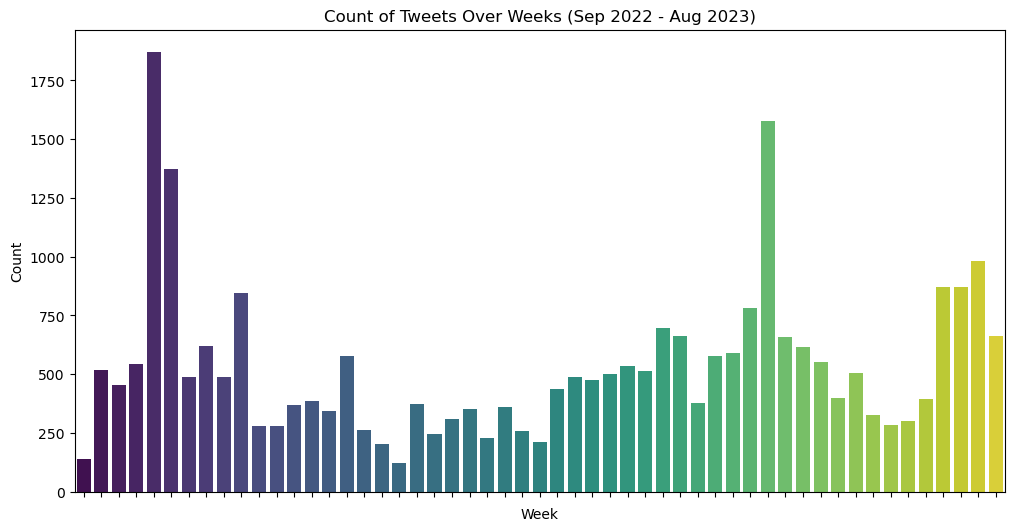

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with 'timestamp' and 'week' columns

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Round timestamps to the nearest week
df['week'] = df['timestamp'].dt.to_period('W')

# Filter the DataFrame to include data from September 2022 to September 2023
df = df[(df['timestamp'] >= '2022-09-01') & (df['timestamp'] < '2023-09-01')]

# Sort the DataFrame by the 'week' column
df = df.sort_values(by='week')

# Create a custom transformation function for week labels
def transform_week(week):
    if week.week == 1:
        return week.start_time.strftime('%B %Y')
    elif week.week % 4 == 1:
        return week.start_time.strftime('%B %Y')
    else:
        return '.'

# Apply the transformation to the 'week' column to create custom labels
df['custom_week'] = df['week'].apply(transform_week)

# Create the countplot with bars for each week
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='week', palette='viridis')

# Remove x-tick labels
ax.set_xticklabels([])

plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Count of Tweets Over Weeks (Sep 2022 - Aug 2023)')
plt.show()


In [272]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with a 'timestamp' column in datetime format

# Round timestamps to the nearest month
df['month'] = df['timestamp'].dt.to_period('M')

# Group the data by month and count the number of tweets in each month
monthly_tweet_counts = df.groupby('month').size().reset_index(name='tweet_count')

# Display the resulting table
print(monthly_tweet_counts)

      month  tweet_count
0   2022-09         2482
1   2022-10         4092
2   2022-11         1872
3   2022-12         1584
4   2023-01         1142
5   2023-02         1192
6   2023-03         1975
7   2023-04         2482
8   2023-05         3299
9   2023-06         2762
10  2023-07         1549
11  2023-08         3722


C:\Users\tomsb\AppData\Local\Temp\ipykernel_18692\2526133580.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['timestamp'].dt.to_period('M')


In [273]:
len(df)

28153

In [274]:
# Calculate descriptive statistics for the specified columns
statistics = df[['likes', 'replies', 'retweets', 'quotes']].describe()

# Display the descriptive statistics
print(statistics)

              likes      replies      retweets        quotes
count  28153.000000  28153.00000  28153.000000  28153.000000
mean       9.373530      1.12123      1.490214      0.180656
std       74.818517      6.92064     11.274680      3.045602
min        0.000000      0.00000      0.000000      0.000000
25%        0.000000      0.00000      0.000000      0.000000
50%        1.000000      0.00000      0.000000      0.000000
75%        4.000000      1.00000      1.000000      0.000000
max    10480.000000    800.00000   1601.000000    477.000000


C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

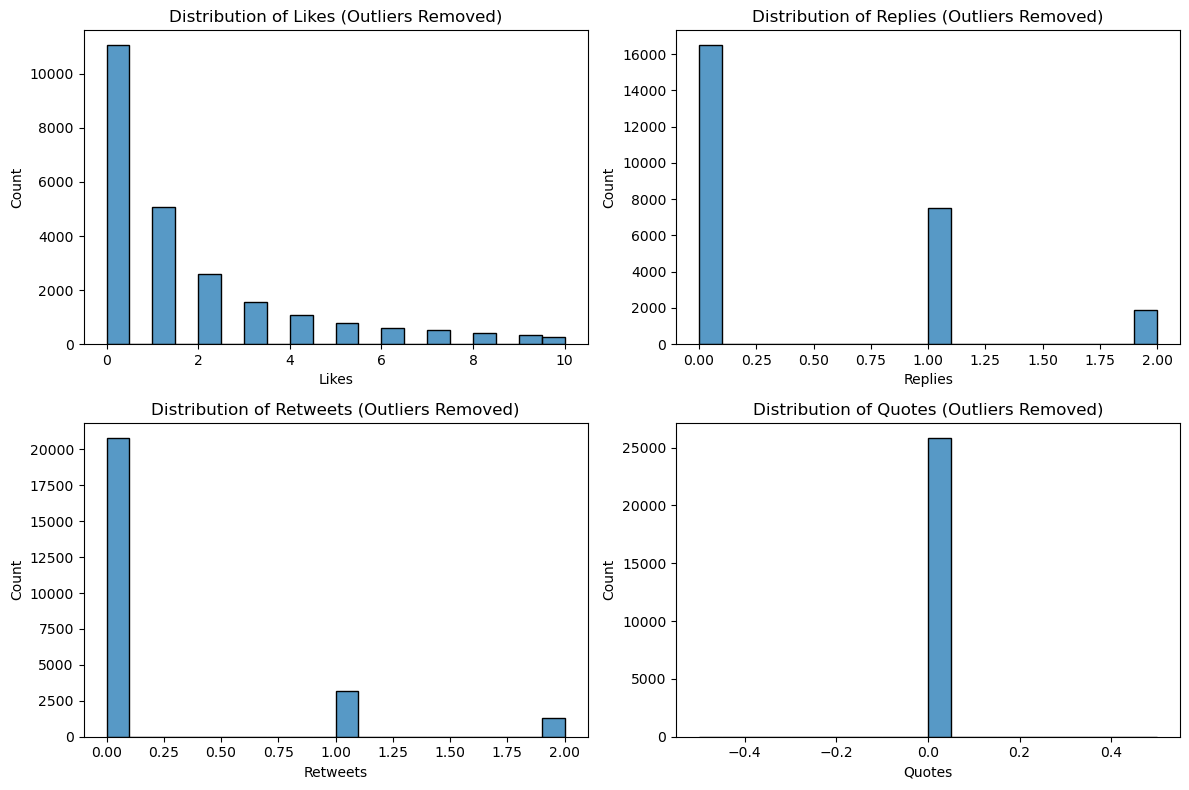

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define quartile values (25th and 75th percentiles) for each column
likes_25th = df['likes'].quantile(0.25)
likes_75th = df['likes'].quantile(0.75)
replies_25th = df['replies'].quantile(0.25)
replies_75th = df['replies'].quantile(0.75)
retweets_25th = df['retweets'].quantile(0.25)
retweets_75th = df['retweets'].quantile(0.75)
quotes_25th = df['quotes'].quantile(0.25)
quotes_75th = df['quotes'].quantile(0.75)

# Calculate the IQR for each column
likes_iqr = likes_75th - likes_25th
replies_iqr = replies_75th - replies_25th
retweets_iqr = retweets_75th - retweets_25th
quotes_iqr = quotes_75th - quotes_25th

# Define the upper and lower bounds to identify outliers
likes_upper_bound = likes_75th + 1.5 * likes_iqr
likes_lower_bound = likes_25th - 1.5 * likes_iqr
replies_upper_bound = replies_75th + 1.5 * replies_iqr
replies_lower_bound = replies_25th - 1.5 * replies_iqr
retweets_upper_bound = retweets_75th + 1.5 * retweets_iqr
retweets_lower_bound = retweets_25th - 1.5 * retweets_iqr
quotes_upper_bound = quotes_75th + 1.5 * quotes_iqr
quotes_lower_bound = quotes_25th - 1.5 * quotes_iqr

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Customize the appearance of the histograms with outliers removed
sns.histplot(df[(df['likes'] >= likes_lower_bound) & (df['likes'] <= likes_upper_bound)]['likes'], ax=axes[0, 0], bins=20)
axes[0, 0].set_title('Distribution of Likes (Outliers Removed)')
axes[0, 0].set_xlabel('Likes')
axes[0, 0].set_ylabel('Count')

sns.histplot(df[(df['replies'] >= replies_lower_bound) & (df['replies'] <= replies_upper_bound)]['replies'], ax=axes[0, 1], bins=20)
axes[0, 1].set_title('Distribution of Replies (Outliers Removed)')
axes[0, 1].set_xlabel('Replies')
axes[0, 1].set_ylabel('Count')

sns.histplot(df[(df['retweets'] >= retweets_lower_bound) & (df['retweets'] <= retweets_upper_bound)]['retweets'], ax=axes[1, 0], bins=20)
axes[1, 0].set_title('Distribution of Retweets (Outliers Removed)')
axes[1, 0].set_xlabel('Retweets')
axes[1, 0].set_ylabel('Count')

sns.histplot(df[(df['quotes'] >= quotes_lower_bound) & (df['quotes'] <= quotes_upper_bound)]['quotes'], ax=axes[1, 1], bins=20)
axes[1, 1].set_title('Distribution of Quotes (Outliers Removed)')
axes[1, 1].set_xlabel('Quotes')
axes[1, 1].set_ylabel('Count')

# Add labels and adjust layout
plt.tight_layout()
plt.show()

In [276]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with a 'likes' column

# Sort the data by the 'likes' column
data_sorted = df.sort_values(by='likes')

# Create a list of like thresholds including 0, 1, 2, 3, ..., 1000
like_thresholds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 100, 1000]

# Calculate the cumulative count of tweets for each like threshold
cumulative_counts = []
for threshold in like_thresholds:
    cumulative_count = (data_sorted['likes'] >= threshold).sum()
    cumulative_counts.append(cumulative_count)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Like Threshold': like_thresholds,
    'Cumulative Count': cumulative_counts
})

# Display the cumulative counts table
print(result_df)


    Like Threshold  Cumulative Count
0                0             28153
1                1             17097
2                2             12026
3                3              9411
4                4              7833
5                5              6745
6                6              5944
7                7              5351
8                8              4827
9                9              4416
10              10              4070
11              15              2950
12              20              2338
13              30              1672
14              50              1062
15             100               496
16            1000                10


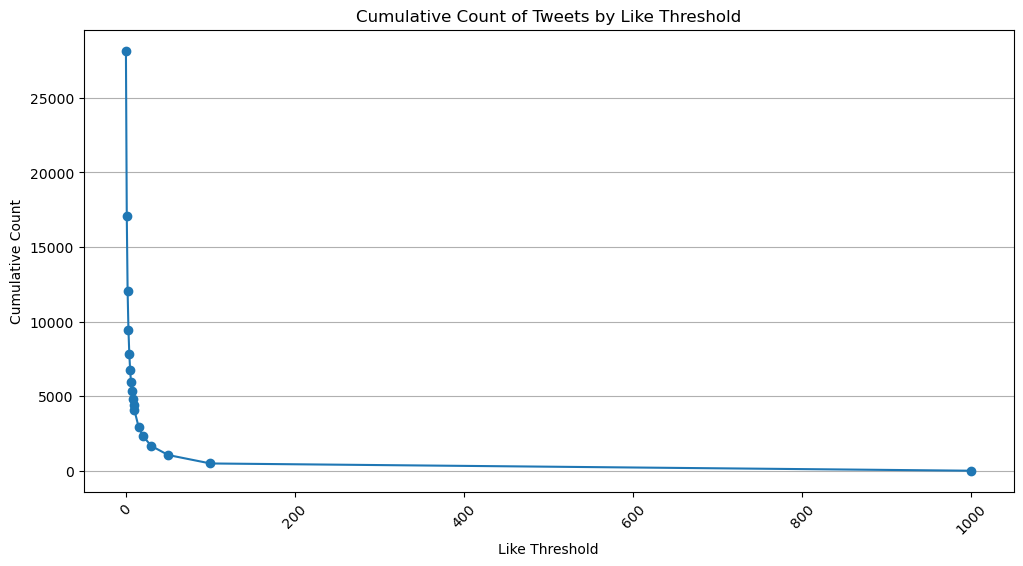

In [277]:
# import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with a 'likes' column

# Sort the data by the 'likes' column
data_sorted = df.sort_values(by='likes')

# Create a list of like thresholds including 0, 1, 2, 3, ..., 1000
like_thresholds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 100, 1000]

# Calculate the cumulative count of tweets for each like threshold
cumulative_counts = []
for threshold in like_thresholds:
    cumulative_count = (data_sorted['likes'] >= threshold).sum()
    cumulative_counts.append(cumulative_count)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Like Threshold': like_thresholds,
    'Cumulative Count': cumulative_counts
})

# Create a line plot without vertical grid lines
plt.figure(figsize=(12, 6))
plt.plot(result_df['Like Threshold'], result_df['Cumulative Count'], marker='o', linestyle='-')
plt.title('Cumulative Count of Tweets by Like Threshold')
plt.xlabel('Like Threshold')
plt.ylabel('Cumulative Count')
plt.grid(axis='y')  # Remove vertical grid lines, keep horizontal grid lines
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees to avoid overlap
plt.show()


# PREPROCESSING

In [278]:
# Text Cleaning:

# Removing HTML tags (if applicable).
# Handling special characters, symbols, and emoji.
# Converting text to lowercase.
# Tokenization:

# Splitting text into individual words or tokens.
# Stopword Removal:

# Removing common words (stopwords) like "the," "and," "in," which may not carry significant meaning for certain NLP tasks.
# Punctuation Removal:

# Removing punctuation marks like periods, commas, and exclamation points.
# Lemmatization or Stemming:

# Reducing words to their base or root form. Lemmatization usually produces valid words, while stemming may result in non-words.
# Removing Numbers:

# Eliminating numeric values or digits from the text.
# Handling Contractions:

# Expanding contractions like "don't" to "do not."
# Handling Special Cases:

# Addressing domain-specific text transformations or normalizations, if needed.
# Spell Checking and Correction (optional):

# Identifying and correcting spelling errors.
# Removing or Replacing URLs and User Mentions:

# Replacing URLs and user mentions (e.g., "@username") with placeholders or removing them.
# Removing Short Words:

# Eliminating very short words or tokens that may not carry significant meaning.
# Removing Rare Words (optional):

# Removing words that appear infrequently in the dataset to reduce noise.

# Define a list of latvian stopwords and emoticons

In [279]:
import pandas as pd
import string
import re
import time

# Define your own list of Latvian stopwords
latvian_stopwords = [
    "aiz", "ap", "apakš", "apakšpus", "ar", "arī", "augšpus", "bet", "bez", "bija", "biji", "biju", "bijām",
    "bijāt", "būs", "būsi", "būsiet", "būsim", "būt", "būšu", "caur", "diezin", "droši", "dēļ",
    "esam", "esat", "esi", "esmu", "gan", "gar", "iekam", "iekams", "iekām", "iekāms", "iekš", "iekšpus",
    "ik", "ir", "it", "itin", "iz", "ja", "jau", "jeb", "jebšu", "jel", "jo", "jā", "ka", "kamēr", "kaut",
    "kolīdz", "kopš", "kā", "kļuva", "kļuvi", "kļuvu", "kļuvām", "kļuvāt", "kļūs", "kļūsi", "kļūsiet", "kļūsim",
    "kļūst", "kļūstam", "kļūstat", "kļūsti", "kļūstu", "kļūt", "kļūšu", "labad", "lai", "lejpus", "līdz", "līdzko",
    "ne", "nebūt", "nedz", "nekā", "nevis", "nezin", "no", "nu", "nē", "otrpus", "pa", "par", "pat", "pie", "pirms",
    "pret", "priekš", "pār", "pēc", "starp", "tad", "tak", "tapi", "taps", "tapsi", "tapsiet", "tapsim", "tapt", "tapāt",
    "tapšu", "taču", "te", "tiec", "tiek", "tiekam", "tiekat", "tieku", "tik", "tika", "tikai", "tiki", "tikko", "tiklab",
    "tiklīdz", "tiks", "tiksiet", "tiksim", "tikt", "tiku", "tikvien", "tikām", "tikāt", "tikšu", "tomēr", "topat",
    "turpretim", "turpretī", "tā", "tādēļ", "tālab", "tāpēc", "un", "uz", "vai", "var", "varat", "varēja", "varēji",
    "varēju", "varējām", "varējāt", "varēs", "varēsi", "varēsiet", "varēsim", "varēt", "varēšu", "vien", "virs", "virspus",
    "vis", "viņpus", "zem", "ārpus", "šaipus"
]

# Define a list of known emoticons
known_emoticons = [
    '🙂', '😀', '😃', '😄', '😁', '😆', '😅', '😂', '🤣', '😊', '😇', '😍', '🥰', '😘', '😗', '😙', '😚', '😋', '😛', '😜',
    '😝', '🤑', '🤗', '🤓', '😎', '🤩', '🥳', '😏', '😒', '😞', '😔', '😟', '😕', '🙁', '☹️', '😣', '😖', '😫', '😩', '🥺',
    '😢', '😭', '😤', '😠', '😡', '🤬', '🤯', '😳', '🥴', '😵', '😲', '🤪', '😤', '😆', '😷', '🤒', '🤕', '🤢', '🤮', '🥵',
    '🥶', '😴', '💤', '😪', '👿', '💩', '👻', '💀', '☠️', '👽', '👾', '🤖', '🎃', '😺', '😸', '😹', '😻', '😼', '🙀',
    '😿', '😾', '🤝', '🙌', '👏', '🙏', '🤲', '✍️', '👋', '🤚', '🖐️', '✋', '🖖', '👌', '🤞', '🤟', '🤘', '🤙', '👈',
    '👉', '👆', '🖕', '👇', '☝️', '👍', '👎', '✊', '👊', '🤛', '🤜', '👏', '🙏', '🤝', '💪', '🦵', '🦶', '🖤', '🤍', '🤎'
]

# Define the alphabet characters to use for encoding (English alphabet)
alphabet = 'abcdefghijklmnopqrstuvwxyz'

# Encode emoticons to preserve them

In [280]:
# Generate unique codes for each emoticon using English alphabet letters
emoticon_mapping = {emoticon: f'emoticon{alphabet[i // 26]}{alphabet[i % 26]}' for i, emoticon in enumerate(known_emoticons)}

# Reverse mapping to convert encoded emoticons back to the original
reverse_emoticon_mapping = {v: k for k, v in emoticon_mapping.items()}

In [281]:
# Prior preprocessing, convert tweets to a list (will be passed as a list to the function to iterate over)
tweets = df['text'].tolist()  # Convert all tweets to a list

In [282]:
pip install langdetect

# Define the preprocessing function

In [283]:
import re
import pandas as pd
import time
from langdetect import detect, DetectorFactory

# Define the function to encode emoticons, preprocess, and filter tweets
def preprocess_and_filter_tweets(tweet_list, original_index):
    # Set a seed for reproducibility in langdetect
    DetectorFactory.seed = 42  # You can use any integer as the seed
    cleaned_tweets = pd.Series(index=original_index)

    for idx, tweet in zip(original_index, tweet_list):
        if pd.isna(tweet):
            cleaned_tweets[idx] = ""  # Append an empty string for missing values
        else:
            # Detect the primary language of the tweet
            try:
                tweet_lang = detect(tweet)
            except:
                tweet_lang = "unknown"

            # Check if the detected language is Latvian (you can adjust the threshold)
            if tweet_lang == "lv" or tweet_lang == "unknown":
                # Encode emoticons
                for emoticon, encoded_form in emoticon_mapping.items():
                    tweet = tweet.replace(emoticon, encoded_form)

                # Define regular expression pattern to match URLs with specific domain extensions
                url_pattern = r'\bhttps?://\S+\b|\bwww\.\S+\b|\S+\.(lv|com|net|nra|uz|it|org|eu|ly|bit|ow|video|de|me|ee|news)\S*'

                # Find and replace matched URLs with an empty string
                tweet = re.sub(url_pattern, '', tweet)

                # Remove Twitter handles (tags)
                tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)

                # Remove hashtags
                tweet = re.sub(r'#\w+', '', tweet)

                # Remove single slashes between words
                tweet = re.sub(r'(?<=[^\s])/(?=[^\s])', ' ', tweet)

                # Remove all numbers
                tweet = re.sub(r'\d+', '', tweet)

                # Tokenize the tweet into words
                words = tweet.split()

                # We need this step to ensure that missing spaces after punctuation don't result in merged words
                # Define variables to keep track of merged words and punctuation
                merged_words = []
                current_word = ""

                for char in tweet:
                    if not char.isalnum():  # Check if the character is not alphanumeric
                        # If it's not alphanumeric, append the current word (if not empty) and reset it
                        if current_word:
                            merged_words.append(current_word)
                            current_word = ""
                    else:
                        # If it's alphanumeric, add it to the current word
                        current_word += char

                # Append the last word if not empty
                if current_word:
                    merged_words.append(current_word)

                # Join the merged words into a single string
                cleaned_tweet = ' '.join(merged_words)

                # Convert text to lowercase
                cleaned_tweet = cleaned_tweet.lower()

                # Define a set of Latvian punctuation characters to remove
                latvian_punctuation = set("!,.?;:—()[]{}\"'„“”")

                # Use a regular expression to replace multiple spaces with a single space
                cleaned_tweet = re.sub(r'\s+', ' ', cleaned_tweet)

                # Use a list comprehension to keep hyphens between words
                cleaned_tweet = ''.join(
                    char if (char != '-' or (i > 0 and i < len(cleaned_tweet) - 1 and cleaned_tweet[i - 1].isalpha() and cleaned_tweet[i + 1].isalpha()))
                    else ' '
                    for i, char in enumerate(cleaned_tweet)
                )

                # Use a list comprehension to keep only characters that are not in the set
                cleaned_tweet = ''.join(char for char in cleaned_tweet if char not in latvian_punctuation)

                # Tokenize the tweet into words
                words = cleaned_tweet.split()

                # Remove stopwords
                cleaned_words = [
                    word
                    for word in words
                    if word.lower() not in latvian_stopwords
                ]

                # Join the cleaned words back into a single string
                cleaned_tweet = ' '.join(cleaned_words)

                # Convert encoded emoticons back to the original
                for encoded_form, emoticon in reverse_emoticon_mapping.items():
                    cleaned_tweet = cleaned_tweet.replace(encoded_form, emoticon)

                cleaned_tweets[idx] = cleaned_tweet

    return cleaned_tweets

# Apply the preprocessing function

In [284]:
# Start the timer
start_time = time.time()

# Create a copy of the original DataFrame to preserve it
cleaned_df = df.copy()

# Get the original index of the DataFrame
original_index = cleaned_df.index

# Apply the language detection and preprocessing function to each row in the DataFrame
cleaned_tweets = preprocess_and_filter_tweets(cleaned_df['text'], original_index)

# Create a new DataFrame by combining the original DataFrame and cleaned tweets
cleaned_df['cleaned_text'] = cleaned_tweets

# Remove rows with NaN values in the 'cleaned_text' column
cleaned_df.dropna(subset=['cleaned_text'], inplace=True)

# End the timer
end_time = time.time()

# Calculate and print the execution time
execution = round(end_time - start_time, 1)
print(f'Finished in {execution} seconds')

# Print the results
print(f'Tweets left after language detection: {len(cleaned_df)}')

# Now, 'cleaned_df' contains only the rows with tweets primarily in Latvian, and you've preserved all the original index and columns from the 'df' DataFrame.

C:\Users\tomsb\AppData\Local\Temp\ipykernel_18692\269620423.py:107: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'manuprāt diezgan vienkārši īsi konkrēti pasaka visu tām deputātu izglītībām ko daļai negribas neko dzirdēt deputāts nevar sēdēt klasēm saeimā pilnīgs murgs tie cilvēki kuri nosaka mēs dzīvojam dzīvosim' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_tweets[idx] = cleaned_tweet


Finished in 102.9 seconds
Tweets left after language detection: 26765


In [285]:
len(cleaned_df)

26765

# Removing rare words

In [150]:
from collections import Counter

# Define the column containing the cleaned text
column_name = 'cleaned_text'

# Convert non-string values (e.g., float) to empty strings
cleaned_df[column_name] = cleaned_df[column_name].apply(lambda x: x if isinstance(x, str) else "")

# Calculate the total word count in the 'cleaned_text' column across all rows (tweets)
total_words_before = sum(len(text.split()) for text in cleaned_df[column_name])

# Define a list of threshold percentages
threshold_percentages = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.50]

# Initialize an empty list to store the results
results = []

# Iterate over each threshold percentage
for threshold_percentage in threshold_percentages:
    # Calculate the threshold word count (percentage of total words)
    threshold_word_count = int(total_words_before * threshold_percentage)

    # Calculate the frequency of each unique word
    word_counts = Counter(word for text in cleaned_df[column_name] for word in text.split())

    # Sort the unique words by their frequency in ascending order
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1])

    # Initialize variables for each threshold
    total_removed_words = 0
    infrequent_words = set()
    cumulative_word_count = 0

    # Find infrequent words and calculate cumulative word count
    for word, count in sorted_words:
        if cumulative_word_count >= threshold_word_count:
            break
        infrequent_words.add(word)
        cumulative_word_count += count
        total_removed_words += count

    # Create a copy of the DataFrame
    df_copy = cleaned_df.copy()

    # Remove infrequent words everywhere in the copied DataFrame
    for index, row in df_copy.iterrows():
        text = row[column_name]
        words_in_text = text.split()
        cleaned_words = [word for word in words_in_text if word not in infrequent_words]
        df_copy.at[index, column_name] = ' '.join(cleaned_words)

    # Calculate the total count of words after removal
    total_words_after = sum(len(text.split()) for text in df_copy[column_name])

    # Calculate the statistics
    unique_words_before = len(sorted_words)
    unique_words_removed = len(infrequent_words)
    unique_words_left = unique_words_before - unique_words_removed

    # Append the results to the list
    results.append({'Threshold': f"{threshold_percentage * 100:.2f}%",
                    'Total Words Before': total_words_before,
                    'Total Words Removed': total_removed_words,
                    'Total Words After': total_words_after,
                    'Unique Words Before': unique_words_before,
                    'Unique Words Removed': unique_words_removed,
                    'Unique Words Left': unique_words_left})


# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Print the results DataFrame
results_df

,Threshold,Total Words Before,Total Words Removed,Total Words After,Unique Words Before,Unique Words Removed,Unique Words Left
0,1.00%,492146,4921,487225,66125,4921,61204
1,2.00%,492146,9842,482304,66125,9842,56283
2,3.00%,492146,14764,477382,66125,14764,51361
3,4.00%,492146,19685,472461,66125,19685,46440
4,5.00%,492146,24607,467539,66125,24607,41518
5,10.00%,492146,49214,442932,66125,43102,23023
6,15.00%,492146,73822,418324,66125,52100,14025
7,20.00%,492146,98431,393715,66125,57107,9018
8,25.00%,492146,123041,369105,66125,60096,6029
9,30.00%,492146,147656,344490,66125,62012,4113


# Define the function for removing infrequent words

In [151]:
import pandas as pd
from collections import Counter

def remove_infrequent_words(df, column_name, threshold_percentage):
    # Convert non-string values (e.g., float) to empty strings
    df[column_name] = df[column_name].apply(lambda x: x if isinstance(x, str) else "")

    # Calculate the total word count in the 'cleaned_text' column across all rows (tweets)
    total_words_before = sum(len(text.split()) for text in df[column_name])

    # Calculate the threshold word count (percentage of total words)
    threshold_word_count = int(total_words_before * threshold_percentage)

    # Calculate the frequency of each unique word
    word_counts = Counter(word for text in df[column_name] for word in text.split())

    # Sort the unique words by their frequency in ascending order
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1])

    # Initialize variables for the threshold
    total_removed_words = 0
    infrequent_words = set()
    cumulative_word_count = 0

    # Find infrequent words and calculate cumulative word count
    for word, count in sorted_words:
        if cumulative_word_count >= threshold_word_count:
            break
        infrequent_words.add(word)
        cumulative_word_count += count
        total_removed_words += count

    # Create a copy of the DataFrame
    df_copy = df.copy()

    # Remove infrequent words everywhere in the copied DataFrame
    for index, row in df_copy.iterrows():
        text = row[column_name]
        words_in_text = text.split()
        cleaned_words = [word for word in words_in_text if word not in infrequent_words]
        df_copy.at[index, column_name] = ' '.join(cleaned_words)

    # Calculate the total count of words after removal for each row
    df_copy['Total Words After'] = df_copy[column_name].apply(lambda text: len(text.split()))

    # Rename the DataFrame to the original name ('df')
    df_copy = df_copy.rename(columns={column_name: 'cleaned_text'})

    # Return the DataFrame with infrequent words removed, including the total word count for each row
    return df_copy

# Define the threshold percentage you want to use
threshold_percentage = 0.01  # For example, to remove infrequent words below 10%

# Call the function to get the DataFrame with infrequent words removed
cleaned_df = remove_infrequent_words(cleaned_df, 'cleaned_text', threshold_percentage)

In [ ]:
cleaned_df.drop(columns=['Total Words After'], inplace=True)

In [154]:
total_words_in_cleaned_text = cleaned_df['cleaned_text'].apply(lambda text: len(text.split())).sum()
total_words_in_cleaned_text

487225

In [155]:
len(cleaned_df)

26765

In [156]:
cleaned_df.head()

,text,likes,replies,retweets,quotes,timestamp,url,week,custom_week,month,cleaned_text,Total Words After
33785,"Manuprāt, diezgan vienkārši, īsi un konkrēti p...",7,1,0,1,2022-09-03 12:04:00+00:00,https://twitter.com/mooneshe/status/1566034429...,2022-08-29/2022-09-04,.,2022-09,manuprāt diezgan vienkārši īsi konkrēti pasaka...,29
33784,"Šitādu pipļuku Saeimā? Paldies, nē. Visur rēgo...",0,0,0,0,2022-09-03 12:44:00+00:00,https://twitter.com/vagargovs/status/156604455...,2022-08-29/2022-09-04,.,2022-09,šitādu saeimā paldies visur psrs visur komunis...,30
33783,"Pie varas esot, @krisjaniskarins neieklausās u...",5,2,5,0,2022-09-03 13:18:00+00:00,https://twitter.com/FelisMaculosus/status/1566...,2022-08-29/2022-09-04,.,2022-09,varas esot neieklausās uzņēmējos diskusijām iz...,17
33782,Mī un žē… Rosļikova pagalma puiku partijā 40% ...,19,2,5,1,2022-09-03 13:36:00+00:00,https://twitter.com/polittehnologs/status/1566...,2022-08-29/2022-09-04,.,2022-09,mī žē rosļikova puiku partijā vidējo izglītību...,21
33781,Diemžēl ar garantiju arī tiks Saeimā :(,0,0,0,0,2022-09-03 13:59:00+00:00,https://twitter.com/UldisTrokss/status/1566063...,2022-08-29/2022-09-04,.,2022-09,diemžēl garantiju saeimā,3


# Save preprocessed and not lemmatized full data

In [157]:
# Save the cleaned DataFrame to a CSV file
csv_filename = "preprocessed_not_lemmatized_full_data.csv"
cleaned_df.to_csv(csv_filename, index=False)

print(f"DataFrame saved to {csv_filename}")

DataFrame saved to preprocessed_not_lemmatized_full_data.csv


# Lemmatization

# Important information

In [158]:
# The lemmatization is done using Java program.
# First data is exported to a csv file.
# Next, the Java lemmatization program is executed using the exported file. 
# The lemmatized dataset is finally imported back in Jupyter Notebook using the specified import file.

# Export the dataset before lemmatization

In [159]:
# Export it to a CSV file with the desired name at the specified location
output_file_path = r'C:\Users\tomsb\Lemmas\Datasets\36K_preprocessed_for_lemmatization.csv'
cleaned_df.to_csv(output_file_path, index=False)

# Import the file back affter lemmatization

In [160]:
# Specify the file path
file_path = r'C:\Users\tomsb\Lemmas\Datasets\36K_Lemmatized.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [161]:
len(df)

26765

# Save preprocessed and lemmatized full data

In [162]:
# Save the cleaned DataFrame to a CSV file
csv_filename = "preprocessed_and_lemmatized_full_data.csv"
df.to_csv(csv_filename, index=False)

print(f"DataFrame saved to {csv_filename}")

DataFrame saved to preprocessed_and_lemmatized_full_data.csv


# Import annotated data, preprocess, and save the preprocessed labelled data

In [172]:
labelled_data = pd.read_csv('tweets_for_annotation.csv')

In [173]:
len(labelled_data)

9996

In [174]:
labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9996 non-null   object
 1   label   9996 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.3+ KB


In [175]:
# Remove duplicates
labelled_data = labelled_data.drop_duplicates(subset='text')

# Convert all data in the "text" column to strings
labelled_data['text'] = labelled_data['text'].astype(str)

# Remove any empty tweets
labelled_data = labelled_data[labelled_data['text'].str.strip() != '']

# Reset the index after removing rows
labelled_data.reset_index(drop=True, inplace=True)

labelled_data.head()

,text,label
0,🎉 VĒSTURISKA UZVARA!Šodien Saeima ar 70 balsīm...,1
1,Gobzems nometis visas maskas - šobrīd Saeimā ļ...,-1
2,Šodien Saeimas komisijā atbalstīja manus un NA...,0
3,Latvijas Republikas Saeima gala lasījumā atbal...,0
4,"""Jūlijas Stepeņenko vīrs, biedrs Vjačeslavs St...",-1


In [176]:
len(labelled_data)

9990

# Apply the preprocessing to labelled dataset

In [177]:
tweets = labelled_data['text'].tolist()  # Convert all tweets to a list

In [178]:
# Start the timer
start_time = time.time()

# Create a copy of the original DataFrame to preserve it
cleaned_df = labelled_data.copy()

# Get the original index of the DataFrame
original_index = cleaned_df.index

# Apply the language detection and preprocessing function to each row in the DataFrame
cleaned_tweets = preprocess_and_filter_tweets(cleaned_df['text'], original_index)

# Create a new DataFrame by combining the original DataFrame and cleaned tweets
cleaned_df['cleaned_text'] = cleaned_tweets

# Remove rows with NaN values in the 'cleaned_text' column
cleaned_df.dropna(subset=['cleaned_text'], inplace=True)

# End the timer
end_time = time.time()

# Calculate and print the execution time
execution = round(end_time - start_time, 1)
print(f'Finished in {execution} seconds')

# Print the results
print(f'Tweets left after language detection: {len(cleaned_df)}')

# Now, 'cleaned_df' contains only the rows with tweets primarily in Latvian, and you've preserved all the original index and columns from the 'df' DataFrame.

C:\Users\tomsb\AppData\Local\Temp\ipykernel_18692\269620423.py:107: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'vēsturiska uzvara šodien saeima balsīm pieņēma zvēraudzēšanas aizliegumu kas nosaka pilnībā jāizbeidz dzīvnieku audzēšana kažokādām gada janvārim šie ietekmīgākie likuma grozījumi kas aiztaupīs ciešanas simtiem tūkstošiem dzīvnieku gadu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_tweets[idx] = cleaned_tweet


Finished in 22.3 seconds
Tweets left after language detection: 9985


In [179]:
# Define the threshold percentage
threshold_percentage = 0.01  # For example, to remove infrequent words below 1%

# Call the function to get the DataFrame with infrequent words removed
cleaned_df = remove_infrequent_words(cleaned_df, 'cleaned_text', threshold_percentage)

In [180]:
cleaned_df.head()

,text,label,cleaned_text,Total Words After
0,🎉 VĒSTURISKA UZVARA!Šodien Saeima ar 70 balsīm...,1,uzvara šodien saeima balsīm pieņēma zvēraudzēš...,25
1,Gobzems nometis visas maskas - šobrīd Saeimā ļ...,-1,gobzems visas maskas šobrīd saeimā ļoti aktīvi...,21
2,Šodien Saeimas komisijā atbalstīja manus un NA...,0,šodien saeimas komisijā atbalstīja manus na pr...,30
3,Latvijas Republikas Saeima gala lasījumā atbal...,0,latvijas republikas saeima gala lasījumā atbal...,25
4,"""Jūlijas Stepeņenko vīrs, biedrs Vjačeslavs St...",-1,vīrs biedrs stepaņenko suverēnās varas mēģina ...,14


In [182]:
cleaned_df.drop(columns=['Total Words After'], inplace=True)

In [183]:
len(cleaned_df)

9985

# Save preprocessed and not lemmatized labelled data

In [117]:
# Save the cleaned DataFrame to a CSV file
csv_filename = "preprocessed_not_lemmatized_labelled_data.csv"
cleaned_df.to_csv(csv_filename, index=False)

print(f"DataFrame saved to {csv_filename}")

DataFrame saved to preprocessed_not_lemmatized_labelled_data.csv


# Export the dataset before lemmatization

In [120]:
# Export it to a CSV file with the desired name at the specified location
output_file_path = r'C:\Users\tomsb\Lemmas\Datasets\labelled_dataset_lemmatization.csv'
cleaned_df.to_csv(output_file_path, index=False)
cleaned_df.to_csv(output_file_path, index=False)

# Import the file back after lemmatization

In [121]:
# Specify the file path
file_path = r'C:\Users\tomsb\Lemmas\Datasets\labelled_dataset_lemmatized.csv'

# Read the CSV file into a DataFrame
df_labelled = pd.read_csv(file_path)

In [124]:
df_labelled.head()

,text,label,cleaned_text
0,🎉 VĒSTURISKA UZVARA!Šodien Saeima ar 70 balsīm...,1,vēsturisks uzvara šodien saeima balss pieņemt ...
1,Gobzems nometis visas maskas - šobrīd Saeimā ļ...,-1,gobzems nomest viss maska šobrīd saeima ļoti a...
2,Šodien Saeimas komisijā atbalstīja manus un NA...,0,šodien saeima komisija atbalstīt mans na priek...
3,Latvijas Republikas Saeima gala lasījumā atbal...,0,latvija republika saeima gals lasījums atbalst...
4,"""Jūlijas Stepeņenko vīrs, biedrs Vjačeslavs St...",-1,jūlija stepeņenko vīrs biedrs vjačeslavs stepa...


# Save preprocessed and lemmatized labelled data

In [125]:
# Save the cleaned DataFrame to a CSV file
csv_filename = "preprocessed_and_lemmatized_labelled_data.csv"
df_labelled.to_csv(csv_filename, index=False)

print(f"DataFrame saved to {csv_filename}")

DataFrame saved to preprocessed_and_lemmatized_labelled_data.csv


# Create a sample of 10K tweets for annotation

In [184]:
df_copy = pd.read_csv('preprocessed_not_lemmatized_full_data.csv')
len(df_copy)

26765

In [185]:
df_copy.head()

,text,likes,replies,retweets,quotes,timestamp,url,week,custom_week,month,cleaned_text,Total Words After
0,"Manuprāt, diezgan vienkārši, īsi un konkrēti p...",7,1,0,1,2022-09-03 12:04:00+00:00,https://twitter.com/mooneshe/status/1566034429...,2022-08-29/2022-09-04,.,2022-09,manuprāt diezgan vienkārši īsi konkrēti pasaka...,29
1,"Šitādu pipļuku Saeimā? Paldies, nē. Visur rēgo...",0,0,0,0,2022-09-03 12:44:00+00:00,https://twitter.com/vagargovs/status/156604455...,2022-08-29/2022-09-04,.,2022-09,šitādu saeimā paldies visur psrs visur komunis...,30
2,"Pie varas esot, @krisjaniskarins neieklausās u...",5,2,5,0,2022-09-03 13:18:00+00:00,https://twitter.com/FelisMaculosus/status/1566...,2022-08-29/2022-09-04,.,2022-09,varas esot neieklausās uzņēmējos diskusijām iz...,17
3,Mī un žē… Rosļikova pagalma puiku partijā 40% ...,19,2,5,1,2022-09-03 13:36:00+00:00,https://twitter.com/polittehnologs/status/1566...,2022-08-29/2022-09-04,.,2022-09,mī žē rosļikova puiku partijā vidējo izglītību...,21
4,Diemžēl ar garantiju arī tiks Saeimā :(,0,0,0,0,2022-09-03 13:59:00+00:00,https://twitter.com/UldisTrokss/status/1566063...,2022-08-29/2022-09-04,.,2022-09,diemžēl garantiju saeimā,3


In [186]:
# Convert the 'month' column to a datetime type
df_copy['month'] = pd.to_datetime(df_copy['month'])

# Filter the DataFrame to include only years 2022 and 2023
df_copy = df_copy[(df_copy['month'].dt.year == 2022) | (df_copy['month'].dt.year == 2023)]

# Sort the DataFrame by the 'month' column and 'likes' column
df_copy = df_copy.sort_values(by=['likes', 'likes'], ascending=[True, False])

# Calculate the number of tweets per month
tweets_per_month = 10000 / len(df_copy['month'].dt.strftime('%Y-%m').unique())

# Create an empty DataFrame to store the selected tweets
selected_df = pd.DataFrame(columns=df_copy.columns)

# Loop through each month and select tweets with the most likes
for month, group in df_copy.groupby(df_copy['month'].dt.strftime('%Y-%m')):
    if len(group) <= tweets_per_month:
        # If there are fewer tweets than needed, select all tweets
        selected_tweets = group
    else:
        # If there are enough tweets, select the top tweets with the most likes
        selected_tweets = group.nlargest(int(tweets_per_month), 'likes')
    selected_df = pd.concat([selected_df, selected_tweets], axis=0)

# Reset the index of the resulting DataFrame
selected_df.reset_index(drop=True, inplace=True)

# Rename the DataFrame to df
df_selected = selected_df.copy()

# Now, your resulting DataFrame is named df_selected, with tweets from 2022 and 2023 maintaining the distribution over months and selected based on the most likes within each month.
df_selected['text'].to_csv('dataset_for_annotation.txt', header=False, index=True, sep='\t')

C:\Users\tomsb\AppData\Local\Temp\ipykernel_18692\1464730926.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  selected_df = pd.concat([selected_df, selected_tweets], axis=0)


In [187]:
len(df_selected)

9996